In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224,224]

#Add train & test paths
train_path = '/content/drive/MyDrive/cell_images/train'
test_path = '/content/drive/MyDrive/cell_images/test'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [7]:
#dont train existing layers

for layer in vgg.layers:
    layer.trainable = False

In [8]:
# get folder details and no of folders within train & test

folders = glob('/content/drive/MyDrive/cell_images/test/*')
folders, len(folders)

(['/content/drive/MyDrive/cell_images/test/uninfected',
  '/content/drive/MyDrive/cell_images/test/parasitized'],
 2)

In [9]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [10]:
#Final flatten layer

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
#create a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [12]:
#view the summary of the model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
#step to complie model with loss and optimization method details

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy'
             )

In [14]:
#Using Image data generator to import images from dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
target_size = (224,224)
batch_size = 32

In [16]:
training_set = train_datagen.flow_from_directory(train_path,target_size=target_size,batch_size=batch_size,shuffle=True,
                                                 class_mode='categorical')

Found 1012 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,target_size=target_size,batch_size=batch_size,shuffle=False,
                                                 class_mode='categorical')

Found 506 images belonging to 2 classes.


In [20]:
results = model.fit_generator(training_set,validation_data=test_set,epochs=20,verbose=1,shuffle=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
32/32 [==============================] - 17s 533ms/step - loss: 0.2337 - accuracy: 0.8992 - val_loss: 0.5507 - val_accuracy: 0.7391
Epoch 2/20
32/32 [==============================] - 17s 525ms/step - loss: 0.2225 - accuracy: 0.9051 - val_loss: 0.4921 - val_accuracy: 0.7925
Epoch 3/20
32/32 [==============================] - 17s 521ms/step - loss: 0.2252 - accuracy: 0.8992 - val_loss: 0.5293 - val_accuracy: 0.7945
Epoch 4/20
32/32 [==============================] - 17s 519ms/step - loss: 0.2737 - accuracy: 0.8854 - val_loss: 0.4468 - val_accuracy: 0.8182
Epoch 5/20
32/32 [==============================] - 17s 520ms/step - loss: 0.1939 - accuracy: 0.9239 - val_loss: 0.5968 - val_accuracy: 0.7273
Epoch 6/20
32/32 [==============================] - 17s 521ms/step - loss: 0.2257 - accuracy: 0.8943 - val_loss: 0.5889 - val_accuracy: 0.7490
Epoch 7/20
32/32 [==============================] - 17s 521ms/step - loss: 0.1801 - accuracy: 0.9180 - val_loss: 0.5004 - val_accuracy: 0.7964

In [19]:
results

In [21]:
from tensorflow.keras.models import load_model
model.save("malaria_detector.h5")

In [23]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

In [24]:
losses.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

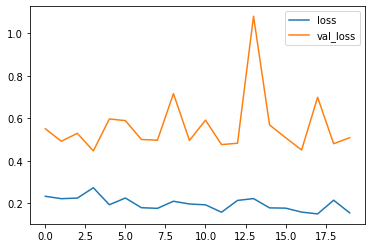

In [25]:
losses[['loss','val_loss']].plot()

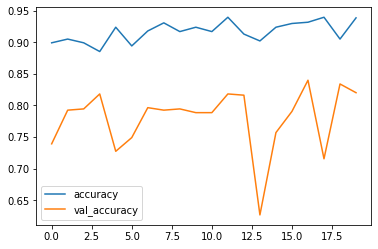

In [27]:
losses[['accuracy','val_accuracy']].plot()

In [44]:
pred_probabilities = model.predict(test_set)

In [52]:
pred_probabilities = pred_probabilities[:,0]

In [53]:
Predictions = pred_probabilities > 0.6 

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(test_set.classes,Predictions))

              precision    recall  f1-score   support

           0       0.18      0.26      0.21       209
           1       0.21      0.14      0.17       297

    accuracy                           0.19       506
   macro avg       0.19      0.20      0.19       506
weighted avg       0.20      0.19      0.19       506



In [19]:
from tensorflow.keras.models import load_model

In [20]:
my_model = load_model("malaria_detector.h5")

In [23]:
pwd

'C:\\Users\\91994\\Desktop\\my_projects\\Malaria_classification'

In [24]:
img_path = "cell_images\\test\\parasitized\\C39P4thinF_original_IMG_20150622_105803_cell_78.png"

In [25]:
img = load_img(img_path,target_size=target_size)

In [28]:
img_arr = image.img_to_array(img)

In [29]:
img_arr.shape

(224, 224, 3)

In [30]:
img_arr = np.expand_dims(img_arr,axis=0)

In [31]:
img_arr.shape

(1, 224, 224, 3)

In [50]:
img_arr1 = img_arr/224

In [38]:
img_arr.max()

0.9776786

In [39]:
img_arr.min()

0.0

In [40]:
image_prediction = my_model.predict(img_arr)

In [47]:
image_prediction

array([[9.9998701e-01, 1.2979867e-05]], dtype=float32)

In [46]:
image_prediction[0][0]

0.999987

In [42]:
training_set.class_indices

{'parasitized': 0, 'uninfected': 1}

In [48]:
def predict_image(img_arr):
    image_prediction = my_model.predict(img_arr)
    if image_prediction[0][0] > 0.6:
        print ("parasitized")
    else:
        print("uninfected")

In [51]:
predict_image(img_arr1)

parasitized


In [59]:
uninf_image_path = "cell_images\\test\\uninfected\\C5NThinF_IMG_20150609_122006_cell_179.png"

In [60]:
ui_img = load_img(uninf_image_path,target_size=target_size)

In [61]:
ui_img_array = image.img_to_array(ui_img)

In [62]:
ui_img_array.shape

(224, 224, 3)

In [63]:
ui_img_array = np.expand_dims(ui_img_array,axis=0)

In [64]:
ui_img_array.shape

(1, 224, 224, 3)

In [65]:
ui_img_array = ui_img_array/224

In [66]:
ui_img_array.max()

0.99553573

In [67]:
predict_image(ui_img_array)

uninfected
